In [53]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import math

# Connect to the database
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

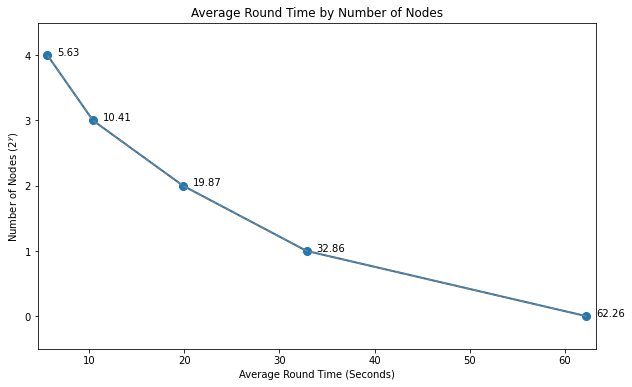

In [54]:
# Query the database to get the average round times for each distinct num_nodes value
cursor.execute("""
    SELECT num_nodes, AVG(round_time)
    FROM round_times
    GROUP BY num_nodes
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Extract the x and y values from the results
x = [result[1] for result in results]
y = [result[0] for result in results]

# Calculate the log base 2 of the y values
log_y = [math.log2(y_value) for y_value in y]

# Create a line graph of the average round times for each distinct num_nodes value
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, log_y, '-o', linewidth=2, markersize=8)

# Smooth the line using a cubic spline interpolation
y_smooth = np.linspace(min(log_y), max(log_y), 200)
x_smooth = np.interp(y_smooth, log_y, x)
plt.plot(x_smooth, y_smooth, '--', color='gray')

# Label each data point
for i, txt in enumerate(x):
    plt.annotate(f'{x[i]:.2f}', (x[i], log_y[i]), textcoords="offset points", xytext=(10,0), ha='left')

plt.xlabel('Average Round Time (Seconds)')
plt.ylabel('Number of Nodes ($2^y$)')
plt.title('Average Round Time by Number of Nodes')

# Set the y-axis limits to 0 and the maximum log_y value, with some padding
plt.ylim(-.5, max(log_y) + 0.5)
# Set the x-axis limits to 0 and the maximum x value, with some padding
plt.xlim(min(x) - 1, max(x) + 1)

# Show the graph
plt.show()


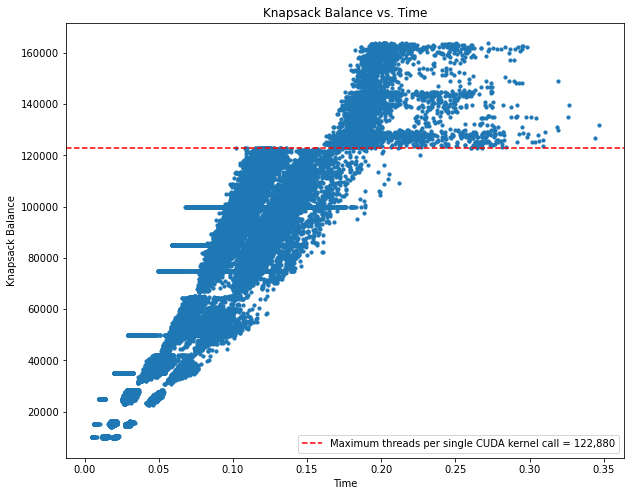

In [55]:
# Query the database to get the data
cursor.execute("""
    SELECT knapsack_balance, time
    FROM knapsack_times
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Store the data in separate lists
knapsack_balance = []
time = []
for result in results:
    knapsack_balance.append(result[0])
    time.append(result[1])

# Create a scatter plot of knapsack_balance vs. time
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(time, knapsack_balance, s=10)

# Add a red line at y = 120*1024, labeled as "maximum threads per single kernel call"
ax.axhline(y=120*1024, color='red', linestyle='--', label='Maximum threads per single CUDA kernel call = 122,880')

ax.set_xlabel('Time')
ax.set_ylabel('Knapsack Balance')
ax.set_title('Knapsack Balance vs. Time')

# Create a legend for the plot
ax.legend()

plt.show()


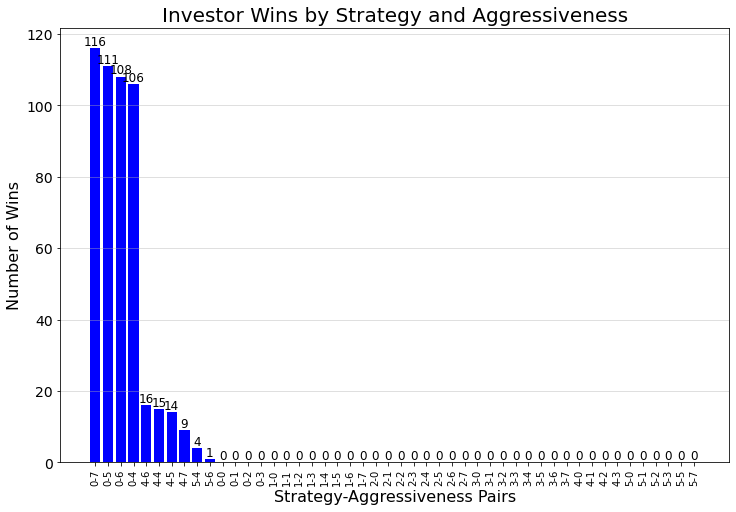

In [56]:
# Query the database to get the data
cursor.execute("""
    SELECT DISTINCT
         DT.investor_strategy AS 'strategy'
        ,DT.investor_aggressiveness AS 'aggressiveness'
        ,COALESCE(T2.wins, 0) AS 'wins'
    FROM
    investor_status AS DT
    LEFT JOIN
    (
        SELECT         
             T.investor_strategy AS 'strategy'
            ,T.investor_aggressiveness AS 'aggressiveness'
            ,COUNT(*) AS 'wins'
        FROM 
        (
            SELECT 
                num_nodes
                ,investor_market
                ,MAX(investor_balance)
                ,investor_strategy 
                ,investor_aggressiveness
            FROM 
                investor_status 
            GROUP BY investor_market, num_nodes
        ) AS T
        GROUP BY T.investor_strategy, T.investor_aggressiveness
    ) AS T2
    ON DT.investor_strategy = T2.strategy AND DT.investor_aggressiveness = T2.aggressiveness
    ORDER BY wins DESC
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Separate the data by strategy and aggressiveness pairs
data = {}
for result in results:
    strategy = result[0]
    aggressiveness = result[1]
    wins = result[2]
    key = f'{strategy}-{aggressiveness}'
    if key not in data:
        data[key] = {
            'wins': wins
        }

# Sort the data by number of wins in descending order
data = dict(sorted(data.items(), key=lambda x: x[1]['wins'], reverse=True))

# Create a vertical bar graph for the data
fig, ax = plt.subplots(figsize=(12, 8))

# Set the plot grid and limits
ax.grid(True, axis='y', alpha=0.5)

# Plot the data as vertical bars with a fixed color
x = np.arange(len(data))
width = 0.8
ax.bar(x, [value['wins'] for value in data.values()], width, color='blue')

# Set the x-axis and y-axis tick labels and tick sizes
ax.set_xticks(x)
ax.set_xticklabels([key for key in data.keys()], fontsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=14)

# Set the x-axis label, title and tick sizes
ax.set_xlabel('Strategy-Aggressiveness Pairs', fontsize=16)
ax.set_ylabel('Number of Wins', fontsize=16)
ax.set_title('Investor Wins by Strategy and Aggressiveness', fontsize=20)

# Label the top of each bar with the number of wins
for i, v in enumerate([value['wins'] for value in data.values()]):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


# Grid Size Scaling

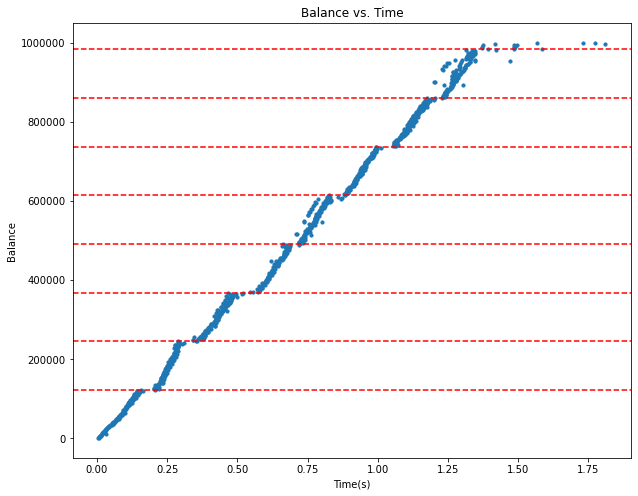

In [69]:



cursor.execute("""
    SELECT balance, time
    FROM kernel_times
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Separate the data into separate lists of x and y values
x = [result[1] for result in results]
y = [result[0] for result in results]

# Create a scatter plot of balance vs. time
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, s=10)

ax.set_xlabel('Time(s)')
ax.set_ylabel('Balance')
ax.set_title('Balance vs. Time')


# Add step lines for cooperative grid size
for step in range(1, 9):
    ax.axhline(y=120*1024 * step, color='red', linestyle='--')




# Turn off scientific notation for y-axis tick labels
ax.ticklabel_format(style='plain', axis='y')

plt.show()


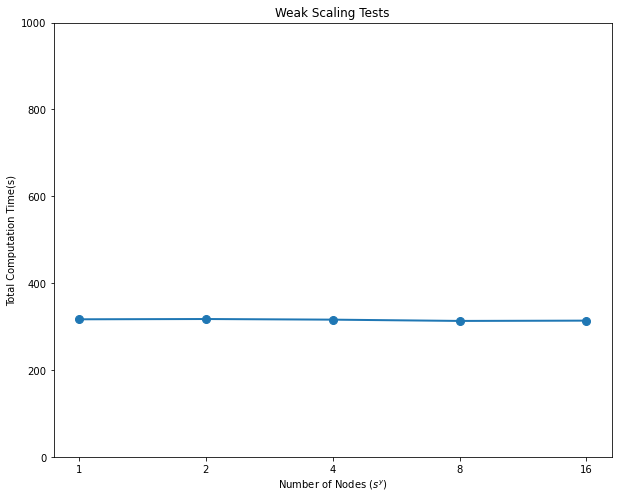

In [68]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# Connect to the database
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

# Query the database to get the data
cursor.execute("""
    SELECT num_nodes, time
    FROM weak_times
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Separate the data into separate lists of x and y values
x = [result[0] for result in results]
y = [result[1] for result in results]

# Convert the x-values to a log base 2 scale
x_log = np.log2(x)

# Create a line graph of num_nodes vs. time
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_log, y, '-o', linewidth=2, markersize=8)

# Format the x-axis ticks to display powers of 2
ticks = [2**i for i in range(int(min(x_log)), int(max(x_log))+1)]
ax.set_xticks(np.log2(ticks))
ax.set_xticklabels(ticks)

ax.set_xlabel('Number of Nodes ($s^y$)')
ax.set_ylabel('Total Computation Time(s)')
ax.set_title('Weak Scaling Tests')
ax.set_ylim([0, 1000])
plt.show()
